## Goal

The goal of this notebook is to develop a binary classifier of reviews on IMDB using the keras framework.

In [1]:
from keras.datasets import imdb

# The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words 
# in the training data. Rare words will be discarded. 

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

25000

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(train_labels[0])

1


In [5]:
max(max(seq) for seq in train_data)

9999

## Word Index

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(w - 3, '?') for w in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
min(word_index.values()), max(word_index.values())

(1, 88584)

In [8]:
reverse_word_index[1], reverse_word_index[2], reverse_word_index[3]

('the', 'and', 'a')

# One Hot Encoding 

In [9]:
import numpy as np


def one_hot_encode(sequences: np.array, dim: int = 10000) -> np.array:
    ret = np.zeros((sequences.shape[0], dim))
    for i, s in enumerate(sequences):
        ret[i, s] = 1 
    return ret

In [10]:
x_train = one_hot_encode(train_data)
x_test = one_hot_encode(test_data)

In [11]:
# the labels are already vectorized

y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

In [12]:
x_train.shape, y_train.shape

((25000, 10000), (25000,))

In [13]:
x_test.shape, y_test.shape

((25000, 10000), (25000,))

# Model 1

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.5105 - acc: 0.7809 - val_loss: 0.3843 - val_acc: 0.8670
Epoch 2/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.2982 - acc: 0.9058 - val_loss: 0.3042 - val_acc: 0.8846
Epoch 3/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.2186 - acc: 0.9280 - val_loss: 0.2771 - val_acc: 0.8903
Epoch 4/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1745 - acc: 0.9419 - val_loss: 0.2740 - val_acc: 0.8897
Epoch 5/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1394 - acc: 0.9548 - val_loss: 0.2826 - val_acc: 0.8870
Epoch 6/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1163 - acc: 0.9635 - val_loss: 0.3007 - val_acc: 0.8843
Epoch 7/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.0964 - acc: 0.9703 - val_loss: 0.3288 - 

In [16]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 10s 384us/step


In [17]:
results

[0.7760933557391166, 0.8502799868583679]

In [18]:
for i in range(len(model.get_weights())):
    print(f'shape of layer {i + 1}: {model.get_weights()[i].shape}')

shape of layer 1: (10000, 16)
shape of layer 2: (16,)
shape of layer 3: (16, 16)
shape of layer 4: (16,)
shape of layer 5: (16, 1)
shape of layer 6: (1,)


In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [20]:
len(history_dict['val_loss']), len(history_dict['acc'])

(20, 20)

## Training and Validation Loss

In [21]:
import matplotlib.pyplot as plt
import keras

def train_val_loss(history: keras.models.Sequential.fit):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

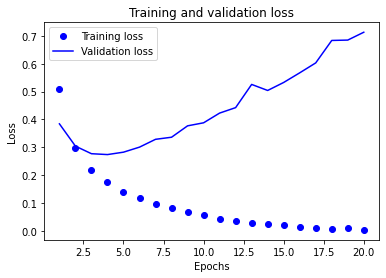

In [22]:
train_val_loss(history)

## Training and Validation Accuracy

In [23]:
def train_val_acc(history: keras.models.Sequential.fit):
    history_dict = history.history
    
    plt.clf()  
    try:
        acc = history_dict['acc'] 
        val_acc = history_dict['val_acc']
    except: 
        acc = history_dict['accuracy']
        val_acc = history_dict['val_accuracy'] 
    
    epochs = range(1, len(val_acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


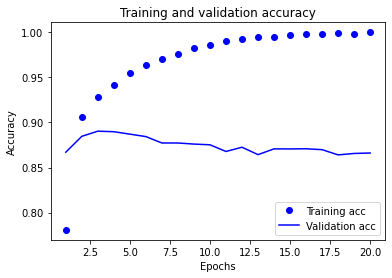

In [24]:
train_val_acc(history)

# Model 2

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.4464 - accuracy: 0.8171
Epoch 2/4
25000/25000 [==============================] - 3s 105us/step - loss: 0.2575 - accuracy: 0.9102
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2008 - accuracy: 0.9285
Epoch 4/4
25000/25000 [==============================] - 16s 629us/step


In [26]:
results

[0.3206835863685608, 0.8723999857902527]

In [27]:
model.predict(x_test)

array([[0.17349511],
       [0.9991447 ],
       [0.4340467 ],
       ...,
       [0.06311914],
       [0.03783348],
       [0.45929694]], dtype=float32)

# Model 3

In [28]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 251us/step - loss: 0.4931 - accuracy: 0.7862 - val_loss: 0.3504 - val_accuracy: 0.8792
Epoch 2/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.2764 - accuracy: 0.9049 - val_loss: 0.2868 - val_accuracy: 0.8901
Epoch 3/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.2024 - accuracy: 0.9273 - val_loss: 0.2873 - val_accuracy: 0.8836
Epoch 4/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1547 - accuracy: 0.9485 - val_loss: 0.2827 - val_accuracy: 0.8886
Epoch 5/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.1229 - accuracy: 0.9611 - val_loss: 0.2986 - val_accuracy: 0.8870
Epoch 6/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.1004 - accuracy: 0.9677 - val_loss: 0.3169 - val_accuracy: 0.8836
Epoch 7/20
15000/15000 [==============================] - 2s 1

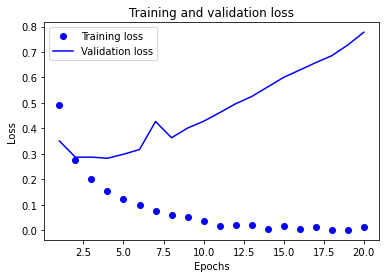

In [29]:
train_val_loss(history)

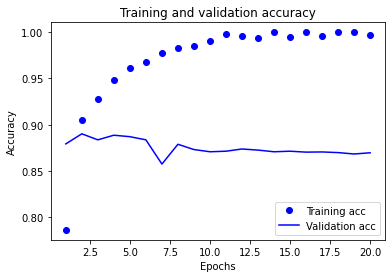

In [30]:
train_val_acc(history)

In [31]:
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/3
25000/25000 [==============================] - 2s 87us/step - loss: 0.2263 - accuracy: 0.9475
Epoch 2/3
25000/25000 [==============================] - 3s 109us/step - loss: 0.1188 - accuracy: 0.9636
Epoch 3/3
25000/25000 [==============================] - 20s 811us/step


[0.4458715937137604, 0.8612800240516663]

# Model 4

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.5509 - accuracy: 0.7741 - val_loss: 0.4297 - val_accuracy: 0.8324
Epoch 2/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.3230 - accuracy: 0.8969 - val_loss: 0.3075 - val_accuracy: 0.8847
Epoch 3/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.2288 - accuracy: 0.9259 - val_loss: 0.2917 - val_accuracy: 0.8843
Epoch 4/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.1810 - accuracy: 0.9391 - val_loss: 0.3030 - val_accuracy: 0.8807
Epoch 5/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1415 - accuracy: 0.9518 - val_loss: 0.3101 - val_accuracy: 0.8791
Epoch 6/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1160 - accuracy: 0.9630 - val_loss: 0.3005 - val_accuracy: 0.8832
Epoch 7/20
15000/15000 [==============================] - 2s 1

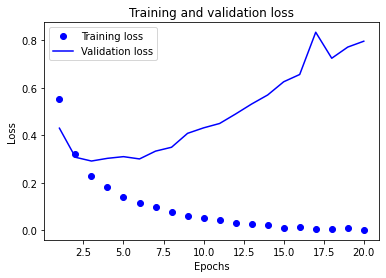

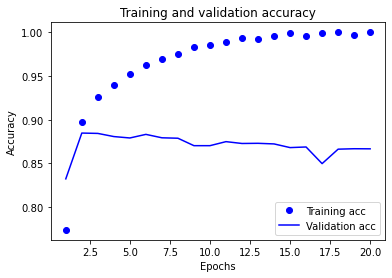

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

train_val_loss(history)
train_val_acc(history)

In [33]:
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/3
25000/25000 [==============================] - 3s 103us/step - loss: 0.2437 - accuracy: 0.9458
Epoch 2/3
25000/25000 [==============================] - 2s 96us/step - loss: 0.1361 - accuracy: 0.9596
Epoch 3/3
25000/25000 [==============================] - 15s 597us/step


[0.4609512261724472, 0.8576800227165222]